# Analyze SVC runs

## Import modules

In [60]:
# import modules
import openml
from openml import tasks, flows, runs
import sklearn
from sklearn import feature_selection
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
import pprint
from collections import OrderedDict, Counter
import re
import numpy as np
import sys
import openmlcontrib
import matplotlib.pyplot as plt
from itertools import combinations
from utils.functions_analyze_runs import get_run_info_svc_str

# enable hgb
enable_hist_gradient_boosting

# set api key
openml.config.apikey = open('.key', 'r').readline().strip('\n')

## Get OpenML runs for SVC flows

In [61]:
# get all supervised classification tasks 
tasks_all = openml.tasks.list_tasks(task_type_id=1, output_format='dataframe', tag = 'OpenML-CC18')

In [62]:
openml.runs.get_run(10428087).flow_id

16374

In [63]:
# create dict
my_runs = openml.runs.list_runs(uploader = [8323], flow=[16345, 16374, 16347, 16366])

In [64]:
my_runs

OrderedDict([(10315690,
              {'run_id': 10315690,
               'task_id': 15,
               'setup_id': 8174187,
               'flow_id': 16345,
               'uploader': 8323,
               'upload_time': '2019-08-14 11:25:39',
               'error_message': ''}),
             (10315691,
              {'run_id': 10315691,
               'task_id': 15,
               'setup_id': 8174188,
               'flow_id': 16345,
               'uploader': 8323,
               'upload_time': '2019-08-14 11:25:55',
               'error_message': ''}),
             (10318493,
              {'run_id': 10318493,
               'task_id': 9957,
               'setup_id': 8174201,
               'flow_id': 16345,
               'uploader': 8323,
               'upload_time': '2019-08-18 10:53:48',
               'error_message': ''}),
             (10318494,
              {'run_id': 10318494,
               'task_id': 9957,
               'setup_id': 8174202,
               'flow_id':

In [65]:
# create list with run ids
my_runs_ids = []
for i in my_runs.items():
    if i[1]['upload_time'] > '2019-11-16 22:50:39':
        my_runs_ids.append(i[1]['run_id'])

In [66]:
len(my_runs_ids)

16566

In [67]:
# relevant parameters
param_names = ['C',
              'coef0',
              'degree',
              'gamma',
              'kernel',
              'max_iter',
              'random_state',
              'probability']


# evaluation metrics
eval_names = ['area_under_roc_curve',
              'average_cost',
              'f_measure',
              'kappa', 
              'kb_relative_information_score', 
              'mean_absolute_error', 
              'mean_prior_absolute_error',
              'weighted_recall', 
              'number_of_instances', 
              'precision', 
              'predictive_accuracy', 
              'prior_entropy', 
              'relative_absolute_error', 
              'root_mean_prior_squared_error', 
              'root_mean_squared_error', 
              'root_relative_squared_error', 
              'total_cost', 
              'unweighted_recall']

# empty data frame 
df_params = pd.DataFrame(columns=['task_id', 'run_id']+param_names+eval_names)

# loop over runs
for i in my_runs_ids:
    print('.', '', end = '')
    
    model_params = get_run_info_svc_str(i).values()
    model_params_series = pd.Series(list(model_params), index=param_names)
    
    # get evaluation metrics from run
    run = openml.runs.get_run(i)
    run_evals = run.evaluations.values()
    if len(run_evals) < 18: # this needs to be fixed
        run_evals = [np.nan]*18
        print('*', '', end='')
    run_evals_series = pd.Series(list(run_evals), index=eval_names)
    
    run_id = run.run_id
    task_id = run.task_id
    ids = pd.Series([task_id, run_id], index=['task_id', 'run_id'])
    
    # append row to data frame
    row = pd.concat([ids, model_params_series, run_evals_series])
    df_params = df_params.append(row, ignore_index = True)
    
# order data frame by auc and reset index
df_params = df_params.sort_values('area_under_roc_curve', ascending=False)
df_params = df_params.reset_index(drop = True)  


# convert variables to numeric
df_params = df_params.apply(pd.to_numeric, errors = 'ignore')

. . . . . . . . . . . . . * . * . . * . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . * . . . . . * . * . . * . . * . . . . . . * . . * . . . . . . . * . . * . . . . . . . . . . . * . . * . * . * . * . . . . * . * . . . . . . . . . . . . . . * . . * . . . . . . . . . * . . . . . . . . . . * . * . . . . . . . . . . . . . . . . . * . * . . . * . * . . . . * . * . * . * . . . . . . * . * . . * . * . . . * . * . * . . . . . . . . * . . * . . . * . * . . . . . * . . . . * . * . . . . . . * . * . . * . . * . . . . * . * . . . . . . . . * . . * . . * . * . * . * . * . * . * . . . * . * . * . * . * . * . * . . . . . * . . * . * . * . * . * . * . * . * . * . * . . * . * . * . * . * . . * . * . . . . . * . . . * . * . * . * . . . . . . * . * . . * . . * . . . * . * . * . . . . . . . . . * . . * . . . * . * . . . . . * . . . * . * . * . . . . . . * . . * . . * . . * . * . . . . . . . . . * . . * . . . * . * . . . . . . * . . . . * . * . * . . . . . . * . * . . * . . * . . . * 

. * . * . * . . * . * . * . . . . . * . . * . . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . . * . * . . . . . * . . . * . * . . . . . . . . * . * . . * . . * . . . * . * . . . . . . . . * . . * . . . * . * . . . . . . * . . . * . * . * . . . . * . . . * . * . . * . * . * . . . . * . * . . . . . . . . * . . * . . . . * . * . . . . . . * . . . * . * . * . * . . . . . . * . * . . * . * . . . . * . * . . . . . . . . * . . * . . . . * . * . . . . . . * . . . . * . * . * . . . . . . . * . . * . . * . . * . * . * . * . . . . . . . . . . * . . . * . . * . * . . . . * . . * . . . * . * . * . . . . . . . * . * . . * . . * . . . . * . * . . . . . . . . * . . * . . . * . * . . . . . . * . . . * . * . * . . . . . . . * . * . . * . . * . . . * . * . * . . . . . . . . * . . * . . * . * . * . * . * . * . * . . * . . * . * . * . * . . * . * . . . . * . . * . . * . * . * . * . * . * . * . * . * . * . * . * . * . . * . * . . . . . * . . . . * . 

* . * . . * . . * . . * . * . * . * . . . . . . * . . . * . . * . . . * . * . * . . * . * . * . * . . . . * . * . . . . * . . . * . * . . * . * . * . . . * . * . * . . . . . . . . * . . * . . * . * . * . * . . * . * . * . . . . * . * . * . . . * . . * . * . . * . * . . * . * . * . * . . . . . * . . . * . . * . * . . * . * . . . . . . * . . . * . * . * . . . . * . . . * . * . . * . . * . . . * . * . * . . . . . . . . * . . * . . . . * . * . . . . . . * . . . . * . * . . . . * . . . * . * . . * . . * . . . . * . * . * . . . * . * . . . . * . . * . . . * . * . . . . . . * . . . * . * . * . . . . . . . * . * . . * . . * . . . . * . * . . . . . . . . * . . * . . * . * . * . * . * . * . * . . . * . * . * . * . * . . * . * . . . . . * . * . * . . . * . * . . . . . * . . . * . * . . . . . . * . * . . * . . * . . . * . * . . . . . . . . * . . . . . . * . * . . . . . . * . . . . * . * . * . . . . . . . * . . * . . * . . . . * . * . . . . . . . . . * . . * . . . * . * . . . . . . * . . . * . * . 

* . * . * . * . . * . * . . . . . . * . . . * . * . * . . . . . . . * . * . . * . * . * . . . . * . * . . . . . . . . * . . . . . * . * . * . * . * . * . * . * . * . * . * . * . * . * . * . . * . * . * . * . * . . . * . * . * . * . * . * . * . . . . * . . * . . * . * . * . * . * . * . * . . . * . * . * . * . . * . * . * . . . . . * . . * . . * . * . * . * . * . * . . . * . * . * . * . . * . * . . . . . * . . . . * . * . * . * . * . * . . . * . * . * . * . . * . * . . . . . * . . * . . . * . * . . . . . * . . . * . * . * . . . . . . * . * . . * . * . * . . . * . * . * . . . . . . . * . . * . . * . * . * . * . * . * . * . * . * . * . * . * . * . * . . * . * . . . . . . * . . . . * . * . * . * . . . . . * . * . . * . . * . . * . * . * . * . * . . . . * . . . . * . . * . * . . . * . * . * . . * . . . * . . . * . * . * . * . * . * . . . . . . * . . * . * . . * . * . * . * . . . . * . . . . * . . * . * . . * . * . . . . . . * . . . * . * . * . . . . * . . . * . * . . * . . * . . . . * . * . 

. . * . * . . . * . * . * . * . . . . * . * . * . * . . * . * . * . . . * . . . . * . . . . . * . * . . . . . . * . . . * . * . * . . . . . . . . * . . * . . * . . . * . * . * . . . . . . . . * . . . . * . . * . * . * . . * . . . * . . . * . * . * . * . * . . . . . * . * . . * . . * . . * . * . * . * . . . . * . . * . . * . . * . * . . . * . * . . . . * . . * . . . * . * . * . . . . . . . * . * . . * . . * . . . * . * . * . . . . . . . . * . * . * . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . * . . . . . . . . . . . . . . * . * . . . . * . . * . * . . . . . . * . . . . . . * . * . . . . . . * . * . . . . . * . . * . * . . . . . . * . . . . . . . * . . . . . . . * . . * . * . . . . . . * . * . . . . . . * . * . . . . . . * . * . . . . . . * . * . . . . . . * . * . . . . * . . * . . . . . * . . * . . . . . . . * . * . . . . . . * . * . . . . . . * . . * . * . . . . . . * . * . . . . . . * . . . . . . . * . . . . . . . * . . . . . . . * . * . . . . * . . * . * . . . . . * 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . * . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . * . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### Count runs per task

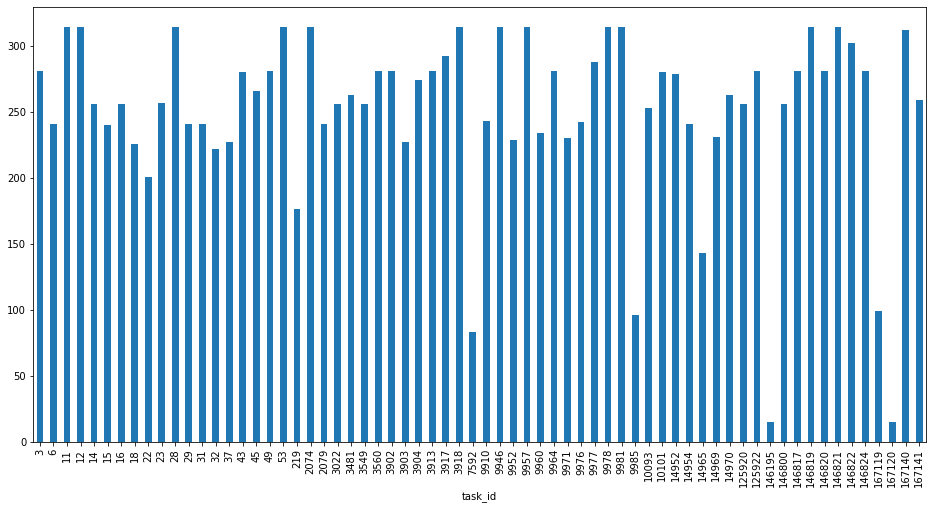

In [68]:
df_params.groupby('task_id').task_id.count().plot(kind = 'bar', figsize = (16,8));

In [46]:
(df_params.groupby('task_id').task_id.count() == 314).sum()

12

In [35]:
len(df_params.task_id.unique())

66

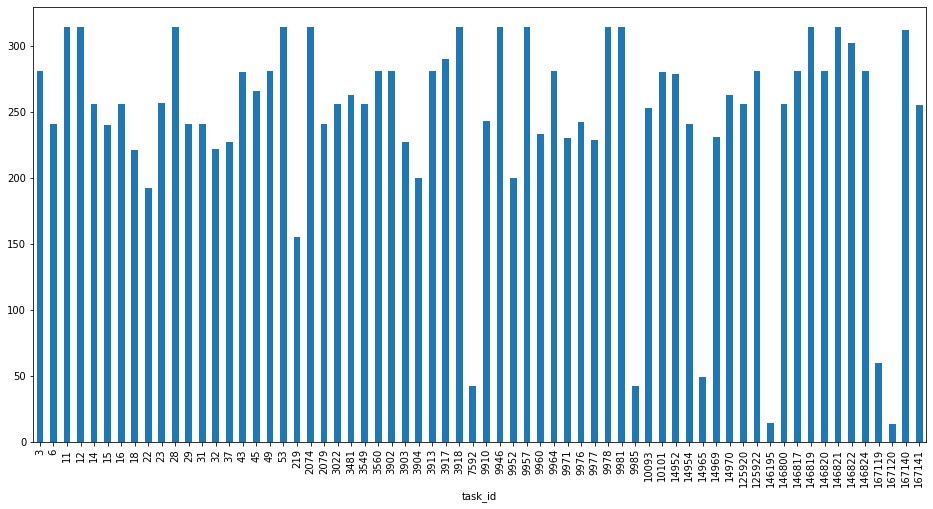

In [9]:
df_params.groupby('task_id').task_id.count().plot(kind = 'bar', figsize = (16,8));

In [13]:
(df_params.groupby('task_id').task_id.count() == 314).sum()

12

In [14]:
len(df_params.task_id.unique())

66

### Task difficulties

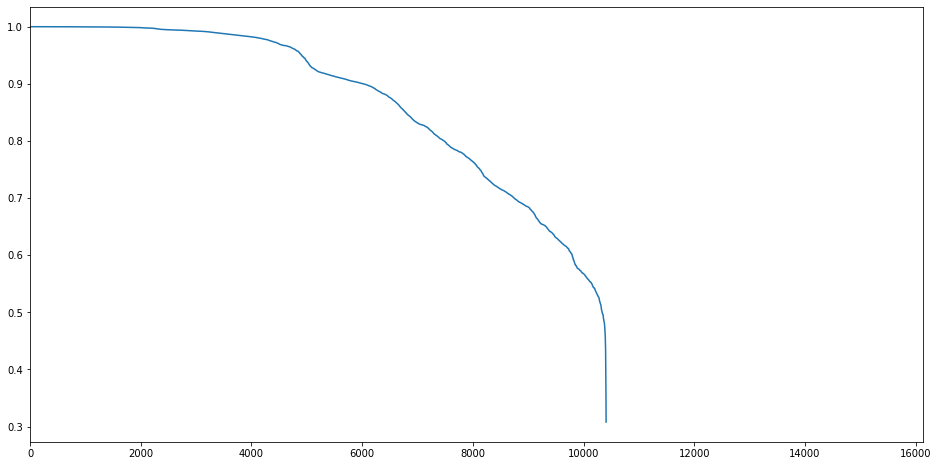

In [15]:
df_params.area_under_roc_curve.plot(figsize = (16,8));

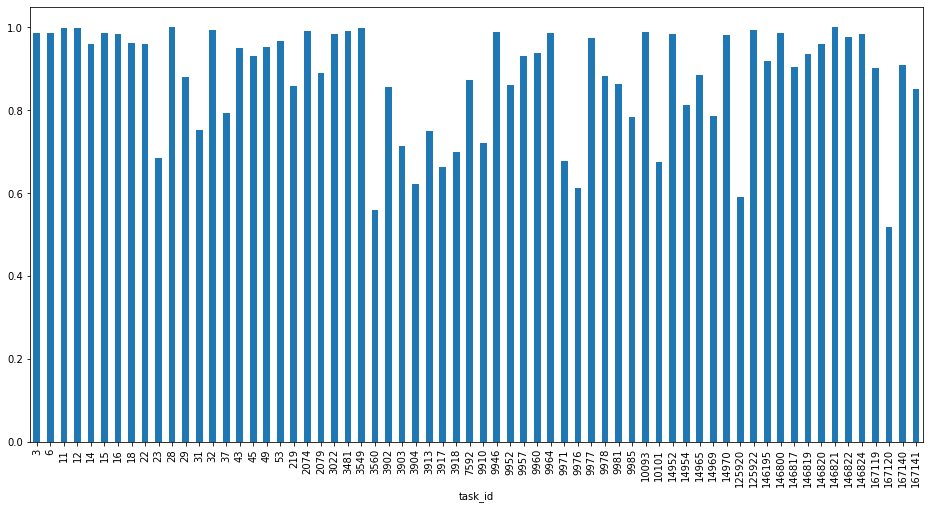

In [16]:
df_params.groupby('task_id')['area_under_roc_curve'].mean().plot(kind = 'bar', figsize = (16,8));

### Check hyperparameters

In [17]:
df_params.iloc[:,2:10]

,C,coef0,degree,gamma,kernel,max_iter,random_state,probability
0,2919.766596,0.000000,3,6.688334,rbf,-1,1,True
1,341.135704,-0.409258,2,0.087943,rbf,-1,1,True
2,131.799551,0.000000,3,0.005450,rbf,-1,1,True
3,17111.743993,0.623804,3,0.000448,poly,-1,1,True
4,166.755110,0.000000,3,0.716100,rbf,-1,1,True
...,...,...,...,...,...,...,...,...
16126,877.923920,0.531069,1,0.018550,poly,-1,1,True
16127,1.082721,0.000000,3,0.012406,rbf,-1,1,True
16128,99.826528,-0.614535,1,0.159408,poly,-1,1,True
16129,2891.405888,-0.151241,3,0.668011,poly,-1,1,True


### Check distributions of relevant hyperparameters

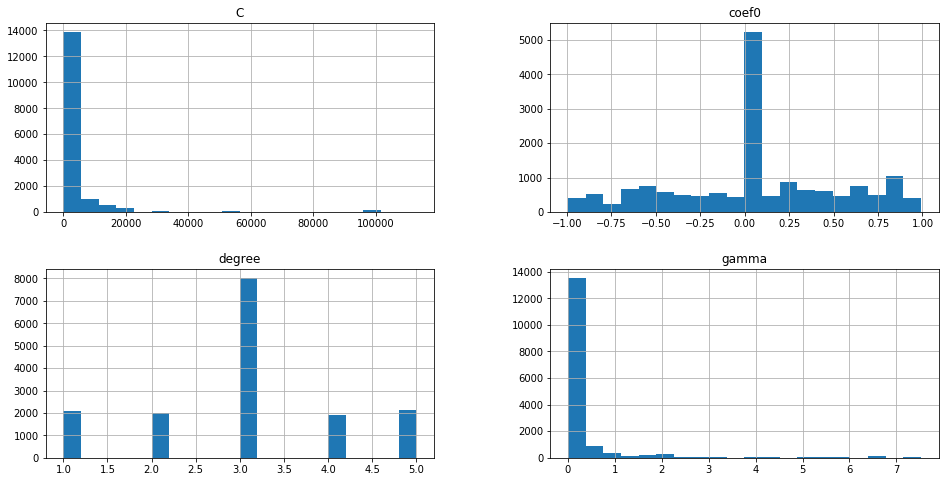

In [18]:
df_params.iloc[:,[2,3,4,5]].hist(figsize = (16,8), bins = 20);

## Use log scale 

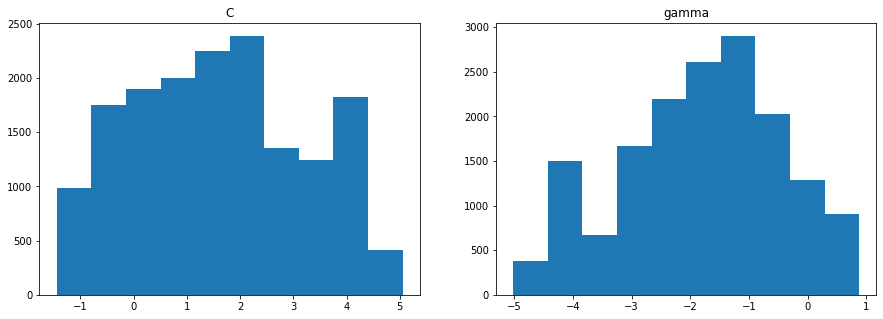

In [19]:
fig = plt.figure(figsize=(15, 5))
count = 1
for  i in ['C', 'gamma']:
    ax = fig.add_subplot(1,2,count)

    ax.hist(np.log10(df_params[i]).replace([np.inf, -np.inf], np.nan))


    ax.set_title(i)
    count += 1
    

In [20]:
h2d, _, _ = np.histogram2d(np.log10(df_params['C']).replace([np.inf, -np.inf], np.nan),
              np.log10(df_params['gamma']).replace([np.inf, -np.inf], np.nan))

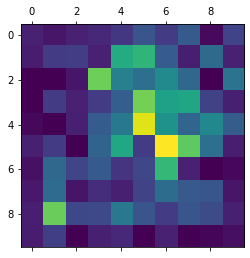

In [21]:
plt.matshow(h2d)

In [22]:
np.log10(df_params[['C', 'gamma']]).replace([np.inf, -np.inf], np.nan)

,C,gamma
0,3.465348,0.825318
1,2.532927,-1.055798
2,2.119914,-2.263635
3,4.233294,-3.349197
4,2.222079,-0.145027
...,...,...
16126,2.943457,-1.731649
16127,0.034516,-1.906371
16128,1.999246,-0.797490
16129,3.461109,-0.175217


In [23]:
df_params.kernel.value_counts()

rbf        11726
poly        3695
sigmoid      710
Name: kernel, dtype: int64

In [24]:
df_params.gamma

0        6.688334
1        0.087943
2        0.005450
3        0.000448
4        0.716100
           ...   
16126    0.018550
16127    0.012406
16128    0.159408
16129    0.668011
16130    0.668011
Name: gamma, Length: 16131, dtype: float64

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

task = openml.tasks.get_task(11)
clf = SVC(gamma="scale", probability=True)
pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), clf)
run = openml.runs.run_model_on_task(pipe, task)

run.publish()
# print feedback
print('View run online: https://www.openml.org/r/' + str(run.run_id))
print('Setup', openml.runs.get_run(run.run_id).setup_id)
print('Flow', openml.runs.get_run(run.run_id).flow_id)
print()

View run online: https://www.openml.org/r/10434465
Setup 8258765
Flow 17447



In [104]:
get_run_info_svc_str(10434465)

{'C': '1.0',
 'coef0': '0.0',
 'degree': '3',
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': '-1',
 'random_state': 1,
 'probability': True}

### Check hyperparameter distributions of top ranked runs

In [82]:
# rank within tasks according to auc
df_params['rank'] = df_params.groupby('task_id')['area_under_roc_curve'].rank('dense', ascending=False)

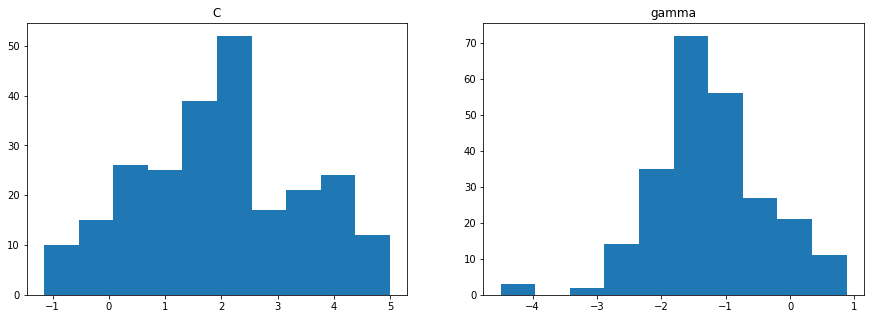

In [83]:
fig = plt.figure(figsize=(15, 5))
count = 1
for  i in ['C', 'gamma']:
    ax = fig.add_subplot(1,2,count)

    ax.hist(np.log10(df_params[df_params['rank'] == 1][i]).replace([np.inf, -np.inf], np.nan))


    ax.set_title(i)
    count += 1
    

### Rank runs over different tasks

In [84]:
group_cols = list(df_params.columns[[2,4,5,6]])
#group_cols = list(df_params.columns[[2,3,5,6]])
group_cols

['C', 'degree', 'gamma', 'kernel']

In [85]:
test = df_params.groupby(group_cols).agg({'rank':['count', 'mean']})
test

rank            
                                      count        mean
C             degree gamma    kernel                   
0.035984      3      5.555948 rbf        25  175.760000
0.038924      3      0.001556 rbf         0         NaN
0.039975      3      0.011043 rbf        37  130.702703
0.045545      3      0.136660 rbf        17  139.352941
0.046275      3      0.000111 sigmoid    18  166.722222
...                                     ...         ...
100000.000000 3      0.001942 rbf        42   80.833333
                     0.002411 rbf        40   78.800000
                     0.100000 rbf        37  107.513514
104658.369080 2      0.003717 rbf         0         NaN
112998.238792 2      1.096237 rbf         0         NaN

[314 rows x 2 columns]